# Police Shootings and Race

In this notebook I wanted to see if race was a contributing factor to police shootings. I found that, although white people are killed in larger numbers overall, when the suspect is armed, <b>black people are 9.5% more likely to be shot and killed</b>, wheras <b>white people is 9.6% less likely to be killed </b> (The other races remain the same whether armed or unarmed) <br>

The data comes from the Washington Post: https://github.com/washingtonpost/data-police-shootings and was obtained from Kaggle. https://www.kaggle.com/jpmiller/police-violence-in-the-us<br>


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prince
%matplotlib inline

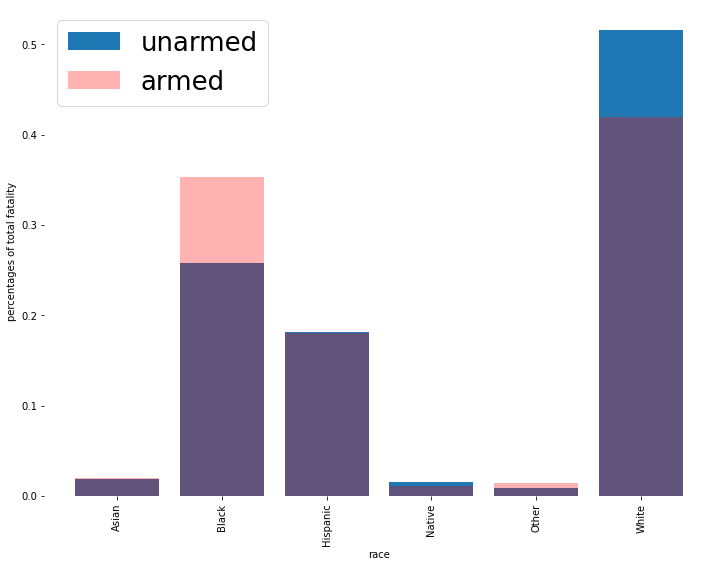

In [202]:
unarmed = reduced[reduced['arms_category'] == 'Unarmed']
armed = reduced[reduced['arms_category'] == 'Armed']
create_scaled_bars(unarmed,armed,'race')

In [203]:
#percentage difference of black people being shot when armed vs unarmed
print(armed[armed['race'] == 'Black'].shape[0]/armed.shape[0] - unarmed[unarmed['race'] == 'Black'].shape[0]/unarmed.shape[0])
#percentage difference of white people being shot when armed vs unarmed
print(armed[armed['race'] == 'White'].shape[0]/armed.shape[0] - unarmed[unarmed['race'] == 'White'].shape[0]/unarmed.shape[0])


0.09503219448643319
-0.09632317529779555


### So you can see that there is actually a difference when it comes to the overall percentage of ethnicities in fatalities when a person is armed. Black people are 9.503% more likely to be shot and killed when armed 

### The Z score translates to a p-value of 0.00842 which is below the usual threshold of 0.05 which shows that this value is statistically significant.

In [204]:
#quickly calculating Z score if being armed makes a Black person more likely to be shot and killed
p_unarmed = unarmed[unarmed['race'] == 'Black'].shape[0]/unarmed.shape[0]
p_armed = armed[armed['race'] == 'Black'].shape[0]/armed.shape[0]
z = (p_armed - p_unarmed)/np.sqrt((p_unarmed * (1-p_unarmed))/armed[armed['race'] == 'Black'].shape[0])
print(z)

2.4075947843264025


## Which descriptive factors most impact if a person is going to be shot

I also wanted to see what would be the most powerful descriptor if you were to cluster on the entire dataset. I took the descriptive variables for the people (age, race, gender, signs_of_mental_illness) and did a factor analysis of mixed data (FAMD) (https://en.wikipedia.org/wiki/Factor_analysis_of_mixed_data) then plotted the results. The FAMD plot shows how the data points cluster together, as well as shows which variables affect the data the most strongly.

No handles with labels found to put in legend.


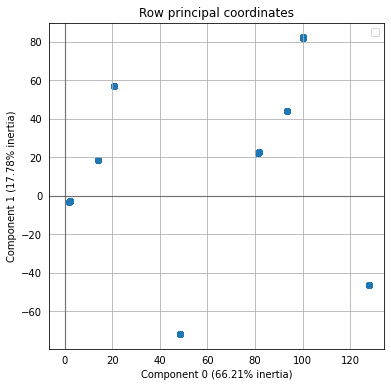

In [213]:
ax = famd.plot_row_coordinates(descriptor_data, 
                               ax =None, 
                               figsize=(6,6), 
                               x_component=0, 
                               y_component=1,
                              ellipse_outline=False,
                              ellipse_fill=True,
                              show_points=True)

You can see that the points from the data are clumped together in different clusters. If you were to analyze the different clusters (one example shown below), you would see that each cluster is comprised of individuals all within the same race. The FAMD analysis also shows that the X axis comprises of 66% of the weight, effectively showing that <b>66% of how a person gets classified in the data is based on race</b>. This is surprising because it shows that <b>race is a more descriptive indicator than age</b>, which one would imagine is important in determining if a person gets shot. <br>

The left segment of clusters are all Female and the right clusters are all Male. This shows that besides race, gender also is highly descriptive of individuals who were shot by police.

             age
count   6.000000
mean   39.166667
std    10.107753
min    28.000000
25%    33.250000
50%    35.500000
75%    46.000000
max    54.000000


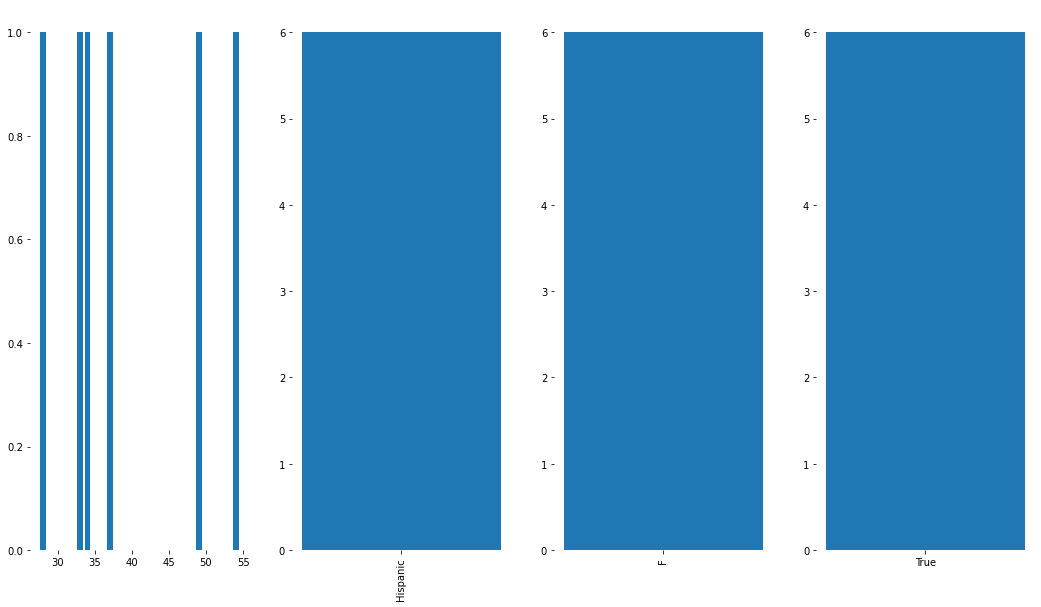

In [206]:
description_breakdown_extended(descriptor_data[(scaled_desc_data[0] > 25) & (scaled_desc_data[0] < 30)])

## Miscellaneous 

This section contains the code that was used in the analysis as well as some more descriptive graphs that show how each cluster breaks down in the graph.

In [93]:
def create_bars(df,col):
    key, counts = np.unique(df[col], return_counts = True)
    fig, ax = plt.subplots(figsize=(12,9))
    ax.bar(height=counts, x=key)
    ax.set_xticklabels(labels=key, rotation=90)
    for _, spine, in ax.spines.items():
        spine.set_visible(False)
    plt.show()

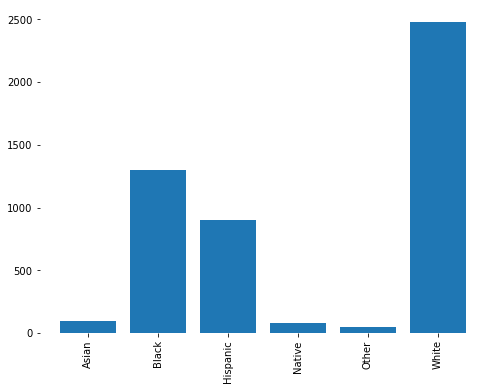

In [32]:
create_bars(data,'race')

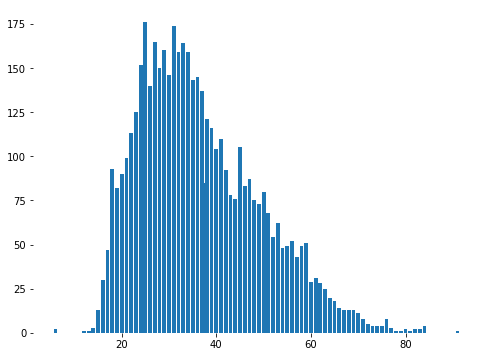

In [35]:
create_bars(data,'age')

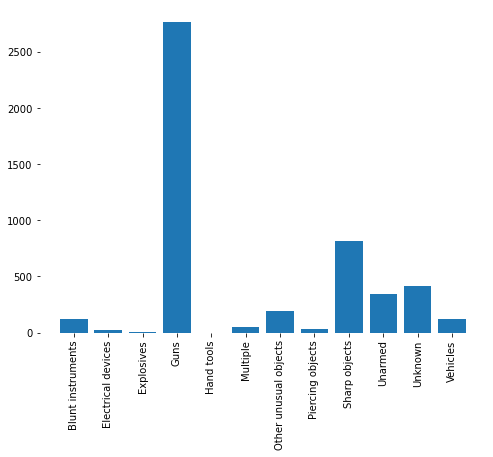

In [38]:
create_bars(data, 'arms_category')

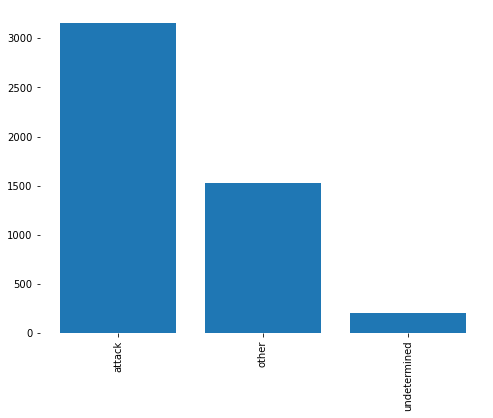

In [39]:
create_bars(data,'threat_level')

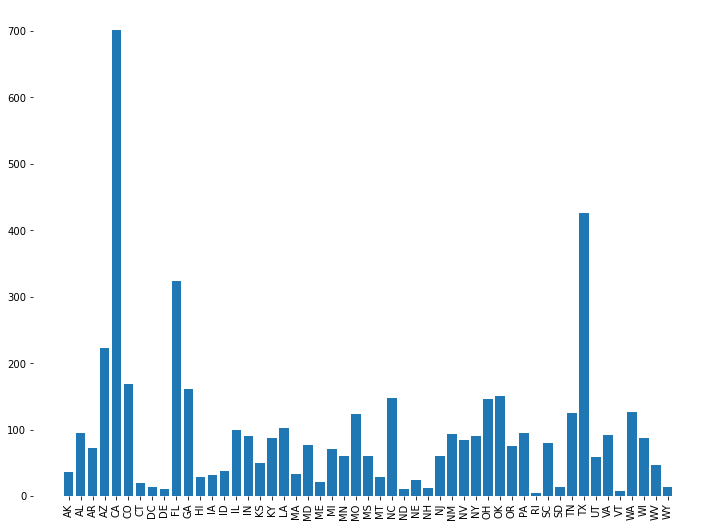

In [42]:
create_bars(data,'state')

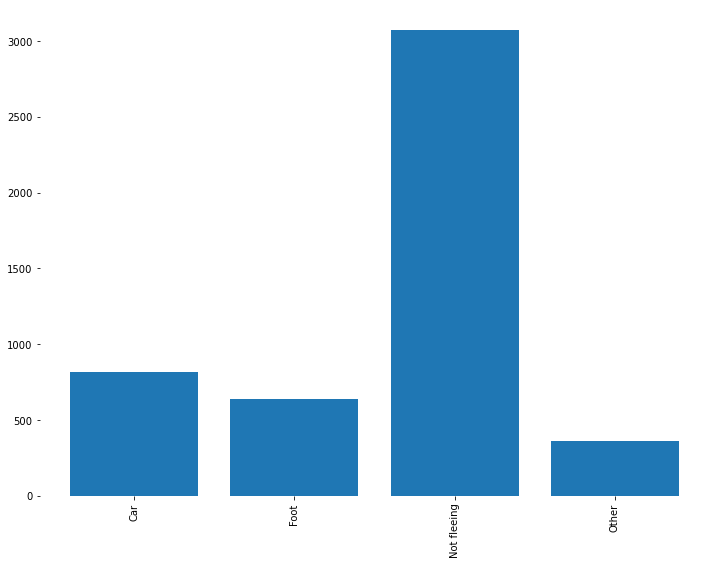

In [43]:
create_bars(data,'flee')

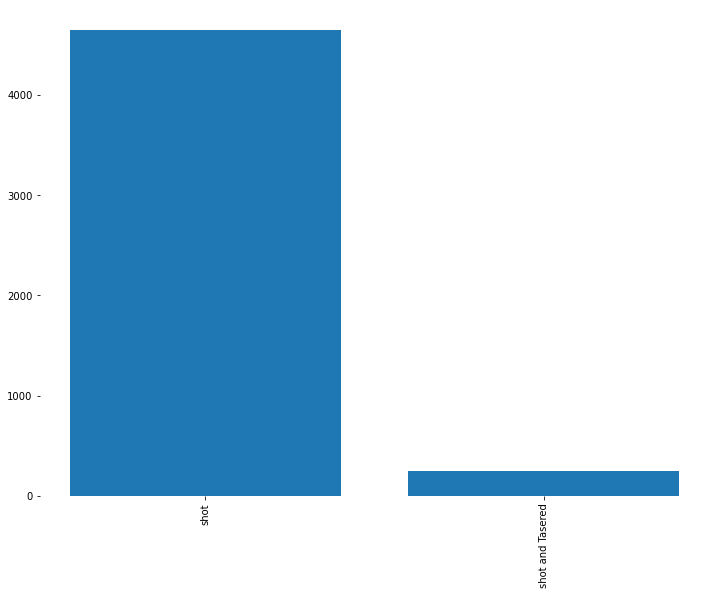

In [44]:
create_bars(data,'manner_of_death')

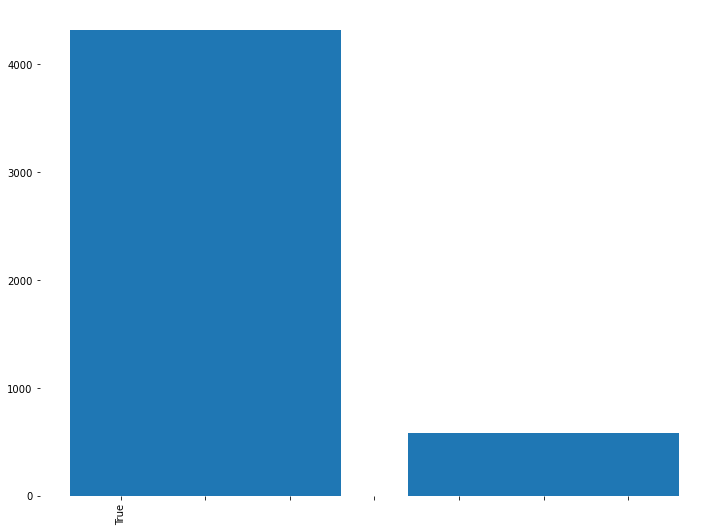

In [46]:
create_bars(data,'body_camera')

Most don't have body cams. Most tend to be death by guns. Peaked in age around 25-35. Most are white, but followed by black and hispanic. Should compare that number based off of the population at large. I think that looking at the populations for each state would also be helpful.

In [209]:
#data = data.drop('id', axis='columns')
descriptor_columns = ['age','gender','race']
descriptor_data = data[descriptor_columns]
descriptor_data.head()

,age,gender,race
0,53.0,M,Asian
1,47.0,M,White
2,23.0,M,Hispanic
3,32.0,M,White
4,39.0,M,Hispanic


In [210]:

famd = prince.FAMD(n_components =2, n_iter = 3,copy = True,check_input = True, engine = 'auto', random_state =42)

In [211]:
famd = famd.fit(descriptor_data)

In [62]:
scaled_desc_data = famd.row_coordinates(descriptor_data)
scaled_desc_data.head()

,0,1
0,81.753685,22.716881
1,127.759997,-46.332227
2,93.291024,43.989242
3,127.759610,-46.326796
4,93.291436,43.983449


In [86]:
descriptor_data[(scaled_desc_data[1] >70) ]

,age,gender,race
9,47.0,M,Black
11,31.0,M,Black
12,41.0,M,Black
14,37.0,M,Black
17,36.0,M,Black
...,...,...,...
4883,24.0,M,Black
4886,38.0,M,Black
4889,62.0,M,Black
4890,27.0,M,Black


looking at these individual clusters you can see that you get these clumps that are essentially gender, race, and age group. You can see though that in each cluster it seems as if race is the biggest descriptor when grouping the categories together, as opposed to age for instance.

In [130]:
def description_breakdown(df):
    print(df.describe())
    fig, ax = plt.subplots(1, 3, figsize=(18,10))
    
        
    key, counts = np.unique(df['age'], return_counts = True)
    ax[0].bar(height=counts, x=key)
    for _, spine, in ax[0].spines.items():
        spine.set_visible(False)
        
    key, counts = np.unique(df['race'], return_counts = True)
    ax[1].bar(height=counts, x=key)
    ax[1].set_xticklabels(labels=key,rotation=90)
    for _, spine in ax[1].spines.items():
        spine.set_visible(False)
        
    key, counts = np.unique(df['gender'], return_counts = True)
    ax[2].bar(height = counts, x= key)
    ax[2].set_xticklabels(labels=key, rotation = 90)
    for _, spine in ax[2].spines.items():
        spine.set_visible(False)
    plt.show()

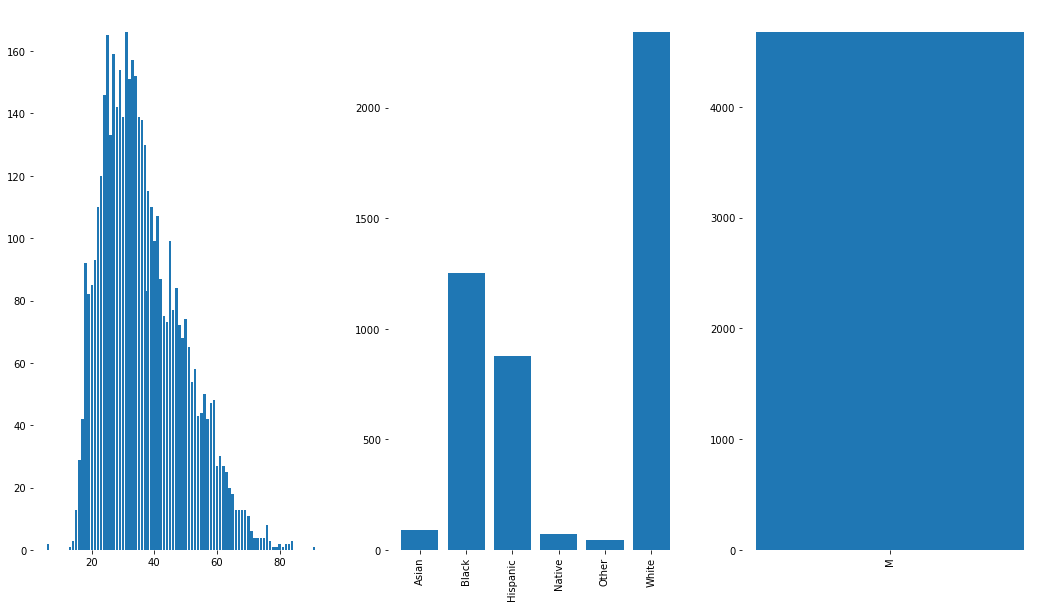

In [121]:
description_breakdown(descriptor_data[(scaled_desc_data[0] > 80) ])

No handles with labels found to put in legend.


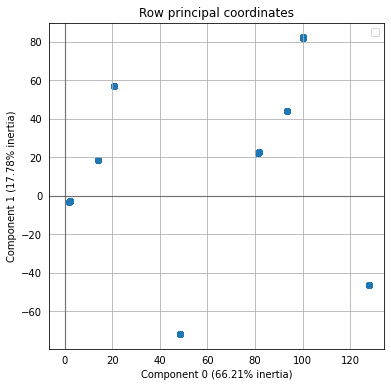

In [212]:
ax = famd.plot_row_coordinates(descriptor_data, 
                               ax =None, 
                               figsize=(6,6), 
                               x_component=0, 
                               y_component=1,
                              ellipse_outline=False,
                              ellipse_fill=True,
                              show_points=True)


             age
count  86.000000
mean   33.594395
std    10.861466
min    16.000000
25%    26.250000
50%    31.000000
75%    38.000000
max    72.000000


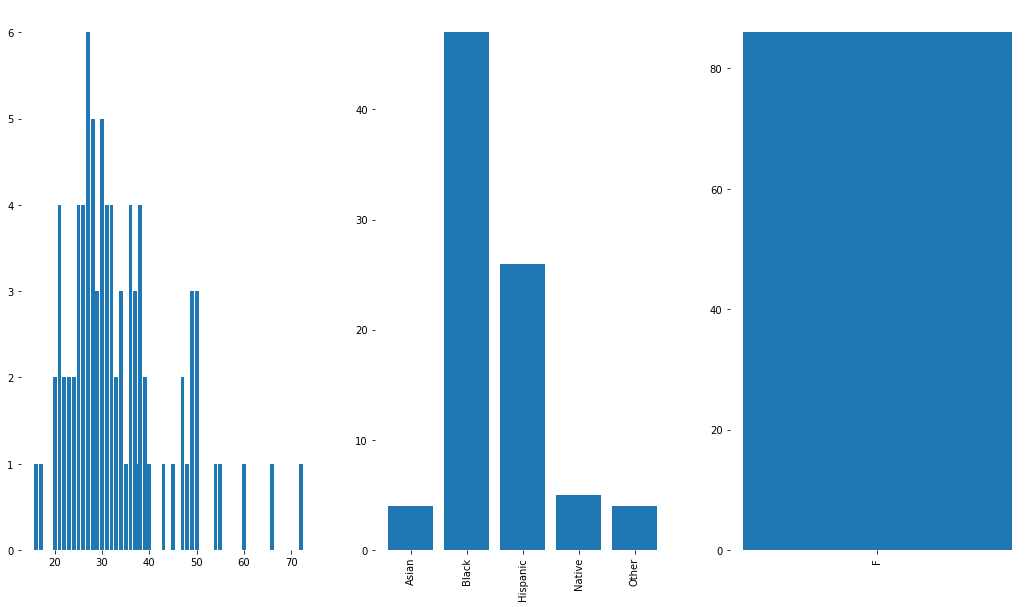

In [132]:
description_breakdown(descriptor_data[(scaled_desc_data[0] < 40) ])

               age
count  2333.000000
mean     33.093019
std      11.048459
min      13.000000
25%      25.000000
50%      32.000000
75%      39.000000
max      80.000000


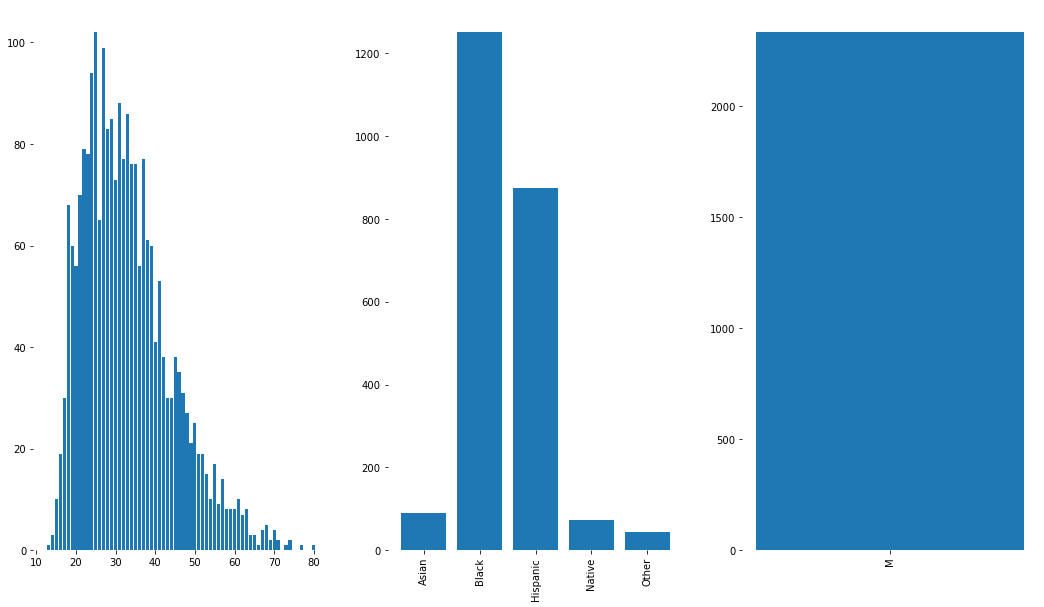

In [133]:
description_breakdown(descriptor_data[(scaled_desc_data[0] < 120) & (scaled_desc_data[0] > 60) ])

               age
count  2340.000000
mean     39.951613
std      13.305104
min       6.000000
25%      30.000000
50%      38.000000
75%      49.000000
max      91.000000


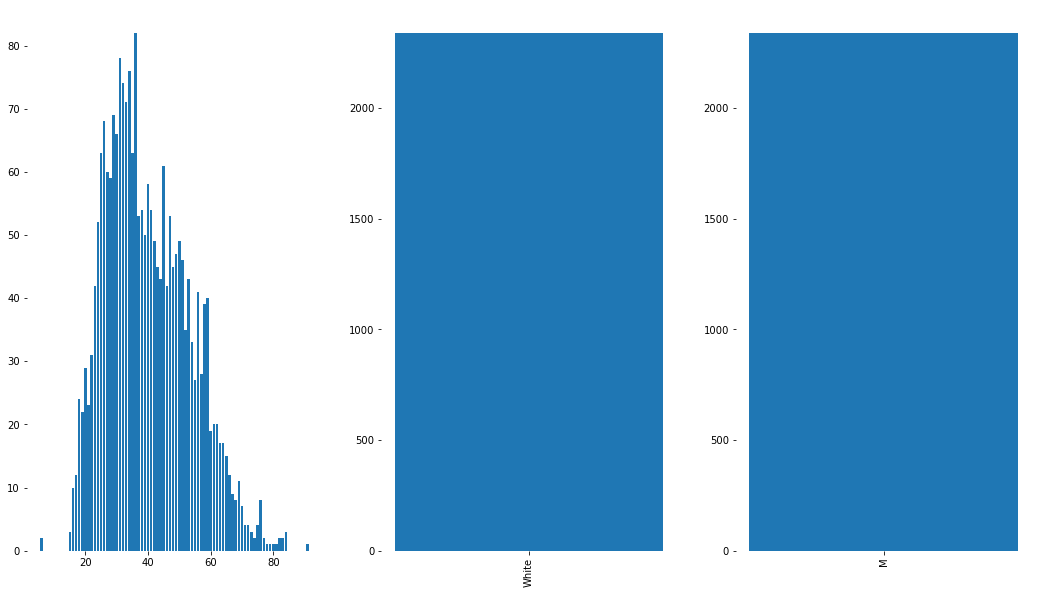

In [134]:
description_breakdown(descriptor_data[(scaled_desc_data[0] > 120) ])

              age
count  136.000000
mean    39.184691
std     13.121626
min     12.000000
25%     29.000000
50%     39.000000
75%     48.250000
max     84.000000


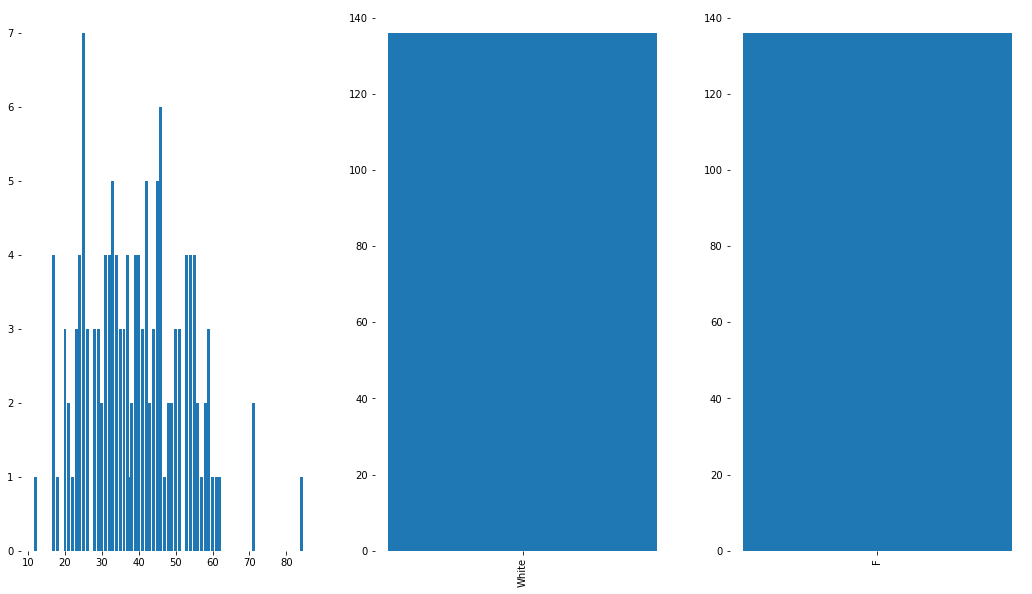

In [131]:
description_breakdown(descriptor_data[(scaled_desc_data[0] < 60) & (scaled_desc_data[0] > 40) ])

Now look at the data if we were to add signs of mental illness

In [148]:
def description_breakdown_extended(df):
    print(df.describe())
    fig, ax = plt.subplots(1, 4, figsize=(18,10))
    
        
    key, counts = np.unique(df['age'], return_counts = True)
    ax[0].bar(height=counts, x=key)
    for _, spine, in ax[0].spines.items():
        spine.set_visible(False)
        
    key, counts = np.unique(df['race'], return_counts = True)
    ax[1].bar(height=counts, x=key)
    ax[1].set_xticklabels(labels=key,rotation=90)
    for _, spine in ax[1].spines.items():
        spine.set_visible(False)
        
    key, counts = np.unique(df['gender'], return_counts = True)
    ax[2].bar(height = counts, x= key)
    ax[2].set_xticklabels(labels=key, rotation = 90)
    for _, spine in ax[2].spines.items():
        spine.set_visible(False)
        
    key, counts = np.unique(df['signs_of_mental_illness'], return_counts = True)
    ax[3].bar(height=counts, x = key)
    for _, spine in ax[3].spines.items():
        spine.set_visible(False)
    plt.show()

In [143]:
data['signs_of_mental_illness'] = data['signs_of_mental_illness'].astype(str)

No handles with labels found to put in legend.


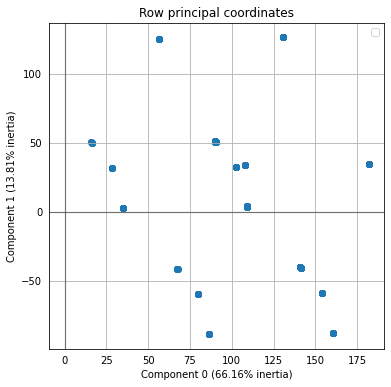

In [144]:
#data = data.drop('id', axis='columns')
descriptor_columns = ['age','gender','race','signs_of_mental_illness']
descriptor_data = data[descriptor_columns]

famd = prince.FAMD(n_components =2, n_iter = 3,copy = True,check_input = True, engine = 'auto', random_state =42)
famd = famd.fit(descriptor_data)
scaled_desc_data = famd.row_coordinates(descriptor_data)

ax = famd.plot_row_coordinates(descriptor_data, 
                               ax =None, 
                               figsize=(6,6), 
                               x_component=0, 
                               y_component=1,
                              ellipse_outline=False,
                              ellipse_fill=True,
                              show_points=True)
#ax.get_figure().savefig('images/famd_row_coordinates.svg')

             age
count   6.000000
mean   39.166667
std    10.107753
min    28.000000
25%    33.250000
50%    35.500000
75%    46.000000
max    54.000000


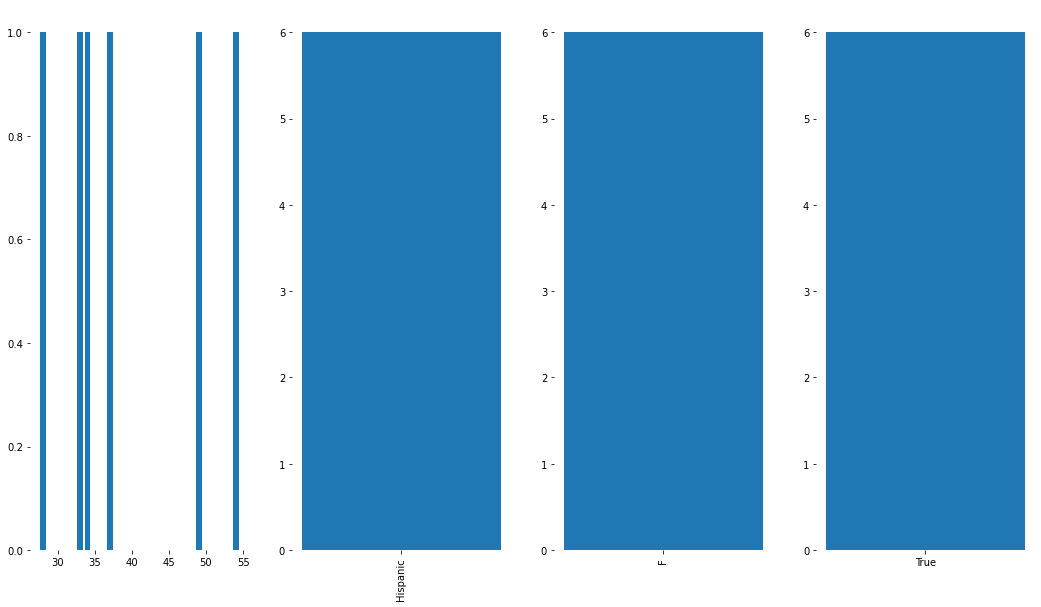

In [150]:
description_breakdown_extended(descriptor_data[(scaled_desc_data[0] > 25) & (scaled_desc_data[0] < 30)])

Adding in the signs of mental illness column makes the data split even more, but the points are still largely clumped by race.

Let's now look at the breakdowns of the shootings based on if the person was armed. Some of the other columns can be arguably subjective (whether a person is hostile, or if someone appears to have a mental illness), so we will be discarding things that are not immediately factual.

In [168]:
def create_scaled_bars(df,df2,col):
    key, counts = np.unique(df[col], return_counts = True)
    total = sum(counts)
    fig, ax = plt.subplots(figsize=(12,9))
    ax.bar(label = 'unarmed',height=list(map(lambda x : x/total, counts)), x=key)
    ax.set_xticklabels(labels=key, rotation=90)
    for _, spine, in ax.spines.items():
        spine.set_visible(False)
        
        
    key, counts = np.unique(df2[col], return_counts = True)
    total = sum(counts)
    ax.bar(label = 'armed', alpha = 0.3, color = 'r', height=list(map(lambda x : x/total, counts)), x=key)
    plt.legend(loc='upper left', prop={'size':26})
    ax.set_ylabel('percentages of total fatality')
    ax.set_xlabel('race')
    plt.show()
    
   

In [157]:
def is_armed(val):
    if val != 'Unarmed':
        return 'Unarmed'
    return 'Armed'

columns = ['race','arms_category']
reduced = data[columns]

reduced = reduced[reduced['arms_category'] != 'Unknown']
reduced['arms_category'] = reduced['arms_category'].apply(lambda x: is_armed(x))

In [214]:
data.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
